In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 300)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

2

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/10".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/10
number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.45172 stdev: 0.14745
Best fitness: 0.77427 - size: (2, 13) - species 2 - id 168
Average adjusted fitness: 0.263
Mean genetic distance 2.879, standard deviation 0.457
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 11.785 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54488 stdev: 0.15256
Best fitness: 0.78850 - size: (3, 15) - species 11 - id 234
Average adjusted fitness: 0.337
Mean genetic distance 3.043, standard deviation 0.482
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 11.299 sec (11.542 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59408 stdev: 0.15199
Best fitness: 0.81138 - size: (4, 17) - species 11 - id 539
Average adjusted fitness: 0.309
Mean genetic distance 3.049, standard deviation 0.477
Population of 202 members in 32 spec

Population's average fitness: 0.69350 stdev: 0.13967
Best fitness: 0.86827 - size: (5, 19) - species 2 - id 2669
Average adjusted fitness: 0.465
Mean genetic distance 3.172, standard deviation 0.513
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.062 sec (17.346 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68254 stdev: 0.14633
Best fitness: 0.86827 - size: (5, 19) - species 2 - id 2669
Average adjusted fitness: 0.412
Mean genetic distance 3.182, standard deviation 0.511
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.793 sec (17.453 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67808 stdev: 0.15095
Best fitness: 0.86827 - size: (5, 19) - species 2 - id 2669
Average adjusted fitness: 0.436
Mean genetic distance 3.179, standard deviation 0.521
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.949 sec (17.596 average)

 ***

Population's average fitness: 0.69562 stdev: 0.13174
Best fitness: 0.86827 - size: (5, 19) - species 40 - id 2669
Average adjusted fitness: 0.397
Mean genetic distance 3.223, standard deviation 0.562
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.456 sec (21.611 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.68077 stdev: 0.16643
Best fitness: 0.86827 - size: (5, 19) - species 42 - id 2669
Average adjusted fitness: 0.426
Mean genetic distance 3.193, standard deviation 0.570
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 21.015 sec (21.559 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66663 stdev: 0.16563
Best fitness: 0.86827 - size: (5, 19) - species 40 - id 2669
Average adjusted fitness: 0.421
Mean genetic distance 3.257, standard deviation 0.560
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.695 sec (21.444 average)

 

Population's average fitness: 0.68296 stdev: 0.15069
Best fitness: 0.87631 - size: (6, 19) - species 40 - id 10697
Average adjusted fitness: 0.412
Mean genetic distance 3.150, standard deviation 0.619
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 20.157 sec (20.348 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.68379 stdev: 0.15058
Best fitness: 0.87631 - size: (6, 19) - species 40 - id 10697
Average adjusted fitness: 0.394
Mean genetic distance 3.119, standard deviation 0.617
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 20.241 sec (20.375 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.68673 stdev: 0.14850
Best fitness: 0.87631 - size: (6, 19) - species 40 - id 10697
Average adjusted fitness: 0.387
Mean genetic distance 3.136, standard deviation 0.614
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 20.851 sec (20.429 average)

Population's average fitness: 0.69316 stdev: 0.15599
Best fitness: 0.87941 - size: (6, 20) - species 40 - id 14584
Average adjusted fitness: 0.395
Mean genetic distance 3.054, standard deviation 0.567
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 21.052 sec (21.082 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.69109 stdev: 0.15636
Best fitness: 0.87941 - size: (6, 20) - species 40 - id 14584
Average adjusted fitness: 0.410
Mean genetic distance 3.028, standard deviation 0.552
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 21.454 sec (21.126 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70002 stdev: 0.14077
Best fitness: 0.87941 - size: (6, 20) - species 40 - id 14584
Average adjusted fitness: 0.400
Mean genetic distance 3.049, standard deviation 0.571
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 21.660 sec (21.173 average)

Population's average fitness: 0.68742 stdev: 0.16256
Best fitness: 0.87941 - size: (6, 20) - species 64 - id 14584
Average adjusted fitness: 0.366
Mean genetic distance 2.973, standard deviation 0.642
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 28.504 sec (26.922 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67309 stdev: 0.17908
Best fitness: 0.87941 - size: (6, 20) - species 64 - id 14584
Average adjusted fitness: 0.415
Mean genetic distance 2.983, standard deviation 0.633
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 27.377 sec (27.045 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.68661 stdev: 0.17043
Best fitness: 0.87941 - size: (6, 20) - species 64 - id 14584
Average adjusted fitness: 0.390
Mean genetic distance 2.967, standard deviation 0.593
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 28.170 sec (27.295 averag

Population's average fitness: 0.72861 stdev: 0.16366
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.468
Mean genetic distance 2.843, standard deviation 0.437
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 23.344 sec (23.668 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.71185 stdev: 0.16521
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.421
Mean genetic distance 2.893, standard deviation 0.459
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 23.435 sec (23.629 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.71822 stdev: 0.17300
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.460
Mean genetic distance 2.891, standard deviation 0.483
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 24.191 sec (23.673 averag

Population's average fitness: 0.69447 stdev: 0.19042
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.434
Mean genetic distance 2.915, standard deviation 0.520
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 29.281 sec (28.708 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.71391 stdev: 0.17557
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.448
Mean genetic distance 2.906, standard deviation 0.531
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 29.430 sec (28.913 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.73382 stdev: 0.16141
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.488
Mean genetic distance 2.912, standard deviation 0.513
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 29.067 sec (29.010 averag

Population's average fitness: 0.74373 stdev: 0.14304
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.451
Mean genetic distance 2.870, standard deviation 0.554
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 31.163 sec (31.204 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.72371 stdev: 0.17423
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.499
Mean genetic distance 2.872, standard deviation 0.545
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.074 sec (31.252 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.71064 stdev: 0.16524
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.430
Mean genetic distance 2.796, standard deviation 0.557
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 30.497 sec (31.156 averag

Population's average fitness: 0.72671 stdev: 0.14121
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.425
Mean genetic distance 3.009, standard deviation 0.573
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 19.803 sec (20.974 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.73040 stdev: 0.14426
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.438
Mean genetic distance 3.015, standard deviation 0.587
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 19.456 sec (20.614 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.71689 stdev: 0.15703
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.435
Mean genetic distance 2.965, standard deviation 0.608
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 19.454 sec (20.292 averag

Population's average fitness: 0.68485 stdev: 0.17570
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.426
Mean genetic distance 3.002, standard deviation 0.599
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 20.786 sec (19.813 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.70653 stdev: 0.15971
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.390
Mean genetic distance 2.991, standard deviation 0.615
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 20.702 sec (19.941 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.71227 stdev: 0.16264
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.400
Mean genetic distance 2.996, standard deviation 0.613
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 20.425 sec (20.045 averag

Population's average fitness: 0.68355 stdev: 0.17843
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.409
Mean genetic distance 2.898, standard deviation 0.656
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 23.379 sec (23.301 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.66883 stdev: 0.19314
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.388
Mean genetic distance 2.913, standard deviation 0.660
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 24.016 sec (23.427 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.67940 stdev: 0.17895
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.416
Mean genetic distance 2.900, standard deviation 0.664
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 24.038 sec (23.516 averag

Population's average fitness: 0.68566 stdev: 0.17604
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.445
Mean genetic distance 2.789, standard deviation 0.498
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.572 sec (19.744 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.70554 stdev: 0.15645
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.420
Mean genetic distance 2.802, standard deviation 0.509
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 20.164 sec (19.744 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.67714 stdev: 0.16929
Best fitness: 0.88497 - size: (7, 22) - species 64 - id 21438
Average adjusted fitness: 0.370
Mean genetic distance 2.813, standard deviation 0.521
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 20.650 sec (19.855 averag

Population's average fitness: 0.59815 stdev: 0.09858
Best fitness: 0.77489 - size: (7, 22) - species 40 - id 1314
Average adjusted fitness: 0.247
Mean genetic distance 3.133, standard deviation 0.471
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 15.104 sec (14.962 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60327 stdev: 0.09272
Best fitness: 0.77489 - size: (7, 22) - species 40 - id 1314
Average adjusted fitness: 0.243
Mean genetic distance 3.134, standard deviation 0.471
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 15.320 sec (15.083 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60325 stdev: 0.09041
Best fitness: 0.77489 - size: (7, 22) - species 40 - id 1314
Average adjusted fitness: 0.246
Mean genetic distance 3.110, standard deviation 0.474
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 15.680 sec (15.269 average)

 

Population's average fitness: 0.60305 stdev: 0.10960
Best fitness: 0.79283 - size: (7, 24) - species 2 - id 4493
Average adjusted fitness: 0.240
Mean genetic distance 3.257, standard deviation 0.515
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 18.276 sec (17.329 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62476 stdev: 0.09906
Best fitness: 0.79283 - size: (7, 24) - species 2 - id 4493
Average adjusted fitness: 0.286
Mean genetic distance 3.261, standard deviation 0.508
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 17.828 sec (17.414 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61396 stdev: 0.10297
Best fitness: 0.79283 - size: (7, 24) - species 2 - id 4493
Average adjusted fitness: 0.239
Mean genetic distance 3.263, standard deviation 0.520
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 17.736 sec (17.483 average)

 ***

Population's average fitness: 0.61102 stdev: 0.10048
Best fitness: 0.80272 - size: (7, 25) - species 2 - id 5942
Average adjusted fitness: 0.225
Mean genetic distance 3.247, standard deviation 0.578
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 19.992 sec (19.453 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.60732 stdev: 0.10533
Best fitness: 0.80272 - size: (7, 25) - species 2 - id 5942
Average adjusted fitness: 0.214
Mean genetic distance 3.229, standard deviation 0.577
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 20.430 sec (19.632 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62500 stdev: 0.09952
Best fitness: 0.80272 - size: (7, 25) - species 2 - id 5942
Average adjusted fitness: 0.274
Mean genetic distance 3.236, standard deviation 0.560
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 20.195 sec (19.810 average)

 ***

Population's average fitness: 0.63533 stdev: 0.10983
Best fitness: 0.82437 - size: (9, 29) - species 41 - id 11433
Average adjusted fitness: 0.322
Mean genetic distance 3.172, standard deviation 0.575
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 20.672 sec (19.494 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63047 stdev: 0.11195
Best fitness: 0.82437 - size: (9, 29) - species 41 - id 11433
Average adjusted fitness: 0.242
Mean genetic distance 3.177, standard deviation 0.585
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 20.362 sec (19.649 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63405 stdev: 0.11093
Best fitness: 0.82437 - size: (9, 29) - species 41 - id 11433
Average adjusted fitness: 0.249
Mean genetic distance 3.166, standard deviation 0.613
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 20.076 sec (19.796 average)

Population's average fitness: 0.62565 stdev: 0.12173
Best fitness: 0.82684 - size: (14, 37) - species 59 - id 14515
Average adjusted fitness: 0.248
Mean genetic distance 3.240, standard deviation 0.600
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 22.283 sec (21.994 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.63267 stdev: 0.11741
Best fitness: 0.82684 - size: (14, 37) - species 59 - id 14515
Average adjusted fitness: 0.271
Mean genetic distance 3.240, standard deviation 0.600
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 21.660 sec (21.950 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.62534 stdev: 0.12137
Best fitness: 0.82684 - size: (15, 37) - species 59 - id 16588
Average adjusted fitness: 0.293
Mean genetic distance 3.227, standard deviation 0.600
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 22.473 sec (22.024 ave

Population's average fitness: 0.61654 stdev: 0.12008
Best fitness: 0.82684 - size: (15, 37) - species 59 - id 16588
Average adjusted fitness: 0.282
Mean genetic distance 2.903, standard deviation 0.655
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 15.013 sec (14.797 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.61249 stdev: 0.12639
Best fitness: 0.82684 - size: (15, 37) - species 59 - id 16588
Average adjusted fitness: 0.212
Mean genetic distance 2.811, standard deviation 0.641
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 15.034 sec (14.899 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.62033 stdev: 0.12067
Best fitness: 0.82684 - size: (15, 37) - species 59 - id 16588
Average adjusted fitness: 0.270
Mean genetic distance 2.762, standard deviation 0.637
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 15.125 sec (14.990 avera

Population's average fitness: 0.64020 stdev: 0.12593
Best fitness: 0.84539 - size: (15, 37) - species 83 - id 24707
Average adjusted fitness: 0.301
Mean genetic distance 3.070, standard deviation 0.573
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.324 sec (16.168 average)

 ****** Running generation 157 ****** 

Population's average fitness: 0.62000 stdev: 0.14274
Best fitness: 0.84539 - size: (15, 37) - species 83 - id 24707
Average adjusted fitness: 0.273
Mean genetic distance 3.101, standard deviation 0.600
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 16.733 sec (16.219 average)

 ****** Running generation 158 ****** 

Population's average fitness: 0.64154 stdev: 0.12408
Best fitness: 0.84539 - size: (15, 37) - species 83 - id 24707
Average adjusted fitness: 0.317
Mean genetic distance 3.106, standard deviation 0.597
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 17.182 sec (16.270 ave

Population's average fitness: 0.63073 stdev: 0.13815
Best fitness: 0.84972 - size: (21, 50) - species 91 - id 27800
Average adjusted fitness: 0.301
Mean genetic distance 3.066, standard deviation 0.613
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 17.470 sec (18.242 average)

 ****** Running generation 181 ****** 

Population's average fitness: 0.63957 stdev: 0.12801
Best fitness: 0.84972 - size: (21, 50) - species 91 - id 27800
Average adjusted fitness: 0.310
Mean genetic distance 3.062, standard deviation 0.622
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 17.516 sec (18.257 average)

 ****** Running generation 182 ****** 

Population's average fitness: 0.62791 stdev: 0.14055
Best fitness: 0.84972 - size: (21, 50) - species 91 - id 27800
Average adjusted fitness: 0.322
Mean genetic distance 3.034, standard deviation 0.607
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 17.860 sec (18.271 ave

Population's average fitness: 0.64545 stdev: 0.14005
Best fitness: 0.84972 - size: (21, 50) - species 91 - id 27800
Average adjusted fitness: 0.341
Mean genetic distance 3.166, standard deviation 0.591
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 19.009 sec (18.642 average)

 ****** Running generation 205 ****** 

Population's average fitness: 0.65227 stdev: 0.13973
Best fitness: 0.84972 - size: (21, 50) - species 91 - id 27800
Average adjusted fitness: 0.412
Mean genetic distance 3.221, standard deviation 0.600
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 18.921 sec (18.736 average)

 ****** Running generation 206 ****** 

Population's average fitness: 0.66328 stdev: 0.12789
Best fitness: 0.84972 - size: (21, 50) - species 91 - id 27800
Average adjusted fitness: 0.293
Mean genetic distance 3.202, standard deviation 0.605
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 19.109 sec (18.791 ave

Population's average fitness: 0.67092 stdev: 0.12393
Best fitness: 0.84972 - size: (27, 58) - species 114 - id 36655
Average adjusted fitness: 0.254
Mean genetic distance 2.941, standard deviation 0.561
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.448 sec (19.482 average)

 ****** Running generation 229 ****** 

Population's average fitness: 0.66469 stdev: 0.12925
Best fitness: 0.84972 - size: (27, 58) - species 114 - id 36655
Average adjusted fitness: 0.339
Mean genetic distance 2.956, standard deviation 0.543
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 20.368 sec (19.607 average)

 ****** Running generation 230 ****** 

Population's average fitness: 0.65314 stdev: 0.13142
Best fitness: 0.84972 - size: (27, 58) - species 114 - id 36655
Average adjusted fitness: 0.332
Mean genetic distance 2.961, standard deviation 0.523
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 20.348 sec (19.755 

Mean genetic distance 3.019, standard deviation 0.495
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 21.414 sec (21.567 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.66844 stdev: 0.12650
Best fitness: 0.85405 - size: (28, 60) - species 114 - id 41360
Average adjusted fitness: 0.356
Mean genetic distance 3.019, standard deviation 0.506
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 21.938 sec (21.593 average)

 ****** Running generation 253 ****** 

Population's average fitness: 0.65932 stdev: 0.14410
Best fitness: 0.85405 - size: (28, 60) - species 114 - id 41360
Average adjusted fitness: 0.368
Mean genetic distance 3.048, standard deviation 0.493
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 21.859 sec (21.690 average)

 ****** Running generation 254 ****** 

Population's average fitness: 0.65752 stdev: 0.13968
Best fitness: 0.85405 - size: (28, 60) - speci

Population's average fitness: 0.67030 stdev: 0.11844
Best fitness: 0.85838 - size: (30, 64) - species 114 - id 44533
Average adjusted fitness: 0.408
Mean genetic distance 2.874, standard deviation 0.500
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 20.728 sec (22.439 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.65465 stdev: 0.13581
Best fitness: 0.85838 - size: (30, 64) - species 134 - id 44533
Average adjusted fitness: 0.363
Mean genetic distance 2.889, standard deviation 0.494
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 20.596 sec (22.271 average)

 ****** Running generation 277 ****** 

Population's average fitness: 0.64413 stdev: 0.14084
Best fitness: 0.85838 - size: (30, 64) - species 134 - id 44533
Average adjusted fitness: 0.385
Mean genetic distance 2.919, standard deviation 0.519
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 20.304 sec (21.972 

Mean genetic distance 2.863, standard deviation 0.512
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 18.479 sec (19.960 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.68417 stdev: 0.13148
Best fitness: 0.86147 - size: (31, 66) - species 134 - id 48266
Average adjusted fitness: 0.340
Mean genetic distance 2.860, standard deviation 0.513
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 19.539 sec (19.872 average)
running:2/10
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47940 stdev: 0.08158
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 73
Average adjusted fitness: 0.139
Mean genetic distance 2.906, standard deviation 0.473
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 6.351 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52373 stdev: 0.08700
Best fitness: 0.705

Mean genetic distance 3.084, standard deviation 0.526
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 9.470 sec (9.121 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61611 stdev: 0.09253
Best fitness: 0.78788 - size: (8, 24) - species 26 - id 3147
Average adjusted fitness: 0.278
Mean genetic distance 3.128, standard deviation 0.518
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 9.351 sec (9.185 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61495 stdev: 0.09678
Best fitness: 0.78788 - size: (8, 24) - species 26 - id 3147
Average adjusted fitness: 0.279
Mean genetic distance 3.140, standard deviation 0.509
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 9.204 sec (9.240 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60737 stdev: 0.09730
Best fitness: 0.78788 - size: (8, 24) - species 26 - id 3147


Mean genetic distance 3.173, standard deviation 0.611
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 10.965 sec (10.654 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.60409 stdev: 0.10348
Best fitness: 0.79468 - size: (10, 28) - species 26 - id 6899
Average adjusted fitness: 0.224
Mean genetic distance 3.158, standard deviation 0.614
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 10.443 sec (10.655 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.59100 stdev: 0.10658
Best fitness: 0.79468 - size: (10, 28) - species 26 - id 6899
Average adjusted fitness: 0.306
Mean genetic distance 3.145, standard deviation 0.637
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 10.526 sec (10.673 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61205 stdev: 0.09914
Best fitness: 0.79468 - size: (10, 28) - species 38 -

Mean genetic distance 3.026, standard deviation 0.649
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 11.661 sec (11.780 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.62119 stdev: 0.10512
Best fitness: 0.79839 - size: (10, 27) - species 26 - id 9268
Average adjusted fitness: 0.275
Mean genetic distance 3.017, standard deviation 0.633
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 11.691 sec (11.762 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.61502 stdev: 0.10412
Best fitness: 0.79839 - size: (10, 27) - species 26 - id 9268
Average adjusted fitness: 0.217
Mean genetic distance 3.062, standard deviation 0.599
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.970 sec (11.824 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.61455 stdev: 0.11158
Best fitness: 0.79839 - size: (10, 27) - species 26 -

Population's average fitness: 0.65241 stdev: 0.12184
Best fitness: 0.81447 - size: (14, 33) - species 53 - id 15158
Average adjusted fitness: 0.335
Mean genetic distance 3.144, standard deviation 0.551
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 11.455 sec (11.743 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.66829 stdev: 0.10077
Best fitness: 0.81447 - size: (14, 33) - species 53 - id 15158
Average adjusted fitness: 0.265
Mean genetic distance 3.161, standard deviation 0.546
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.000 sec (11.773 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.65561 stdev: 0.11422
Best fitness: 0.81447 - size: (14, 33) - species 53 - id 15158
Average adjusted fitness: 0.258
Mean genetic distance 3.152, standard deviation 0.576
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 12.232 sec (11.793 avera

Population's average fitness: 0.66113 stdev: 0.12411
Best fitness: 0.82127 - size: (12, 31) - species 58 - id 17890
Average adjusted fitness: 0.261
Mean genetic distance 3.137, standard deviation 0.586
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 12.195 sec (12.097 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.65945 stdev: 0.12589
Best fitness: 0.82127 - size: (12, 31) - species 66 - id 17890
Average adjusted fitness: 0.268
Mean genetic distance 3.118, standard deviation 0.565
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.625 sec (12.045 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.66841 stdev: 0.11880
Best fitness: 0.82127 - size: (12, 31) - species 58 - id 17890
Average adjusted fitness: 0.259
Mean genetic distance 3.062, standard deviation 0.581
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.676 sec (12.000 ave

Population's average fitness: 0.68464 stdev: 0.10214
Best fitness: 0.83488 - size: (14, 33) - species 66 - id 23289
Average adjusted fitness: 0.280
Mean genetic distance 3.045, standard deviation 0.543
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.914 sec (11.739 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.69972 stdev: 0.09986
Best fitness: 0.83488 - size: (14, 33) - species 66 - id 23289
Average adjusted fitness: 0.297
Mean genetic distance 3.049, standard deviation 0.539
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.840 sec (11.758 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.69722 stdev: 0.10630
Best fitness: 0.83488 - size: (14, 33) - species 66 - id 23289
Average adjusted fitness: 0.297
Mean genetic distance 3.022, standard deviation 0.537
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 11.930 sec (11.818 ave

Population's average fitness: 0.68451 stdev: 0.11870
Best fitness: 0.84106 - size: (20, 43) - species 86 - id 27600
Average adjusted fitness: 0.279
Mean genetic distance 3.079, standard deviation 0.515
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.374 sec (12.446 average)

 ****** Running generation 167 ****** 

Population's average fitness: 0.69163 stdev: 0.10968
Best fitness: 0.84106 - size: (20, 43) - species 86 - id 27600
Average adjusted fitness: 0.282
Mean genetic distance 3.067, standard deviation 0.523
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.679 sec (12.441 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.70220 stdev: 0.10943
Best fitness: 0.84230 - size: (21, 44) - species 96 - id 27939
Average adjusted fitness: 0.296
Mean genetic distance 3.041, standard deviation 0.530
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.154 sec (12.493 ave

Population's average fitness: 0.69381 stdev: 0.12370
Best fitness: 0.84354 - size: (23, 48) - species 96 - id 31089
Average adjusted fitness: 0.291
Mean genetic distance 3.110, standard deviation 0.531
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 16.388 sec (15.636 average)

 ****** Running generation 191 ****** 

Population's average fitness: 0.69222 stdev: 0.11898
Best fitness: 0.84354 - size: (23, 48) - species 96 - id 31089
Average adjusted fitness: 0.300
Mean genetic distance 3.105, standard deviation 0.555
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 16.273 sec (15.790 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.69406 stdev: 0.12354
Best fitness: 0.84354 - size: (23, 48) - species 96 - id 31089
Average adjusted fitness: 0.290
Mean genetic distance 3.073, standard deviation 0.558
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 16.540 sec (15.934 ave

Population's average fitness: 0.66272 stdev: 0.12620
Best fitness: 0.84354 - size: (23, 48) - species 96 - id 31089
Average adjusted fitness: 0.261
Mean genetic distance 3.009, standard deviation 0.630
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 16.417 sec (15.652 average)

 ****** Running generation 215 ****** 

Population's average fitness: 0.66404 stdev: 0.12400
Best fitness: 0.84354 - size: (23, 48) - species 96 - id 31089
Average adjusted fitness: 0.259
Mean genetic distance 3.016, standard deviation 0.625
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 16.238 sec (15.725 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.66560 stdev: 0.13497
Best fitness: 0.84354 - size: (23, 48) - species 96 - id 31089
Average adjusted fitness: 0.310
Mean genetic distance 3.019, standard deviation 0.619
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 15.593 sec (15.736 averag

Population's average fitness: 0.67927 stdev: 0.12101
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.279
Mean genetic distance 3.075, standard deviation 0.622
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 16.299 sec (16.807 average)

 ****** Running generation 239 ****** 

Population's average fitness: 0.67124 stdev: 0.11987
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.269
Mean genetic distance 3.079, standard deviation 0.623
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.158 sec (16.722 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.67846 stdev: 0.11181
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.294
Mean genetic distance 3.046, standard deviation 0.636
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 15.833 sec (16.651 a

Mean genetic distance 2.903, standard deviation 0.503
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 17.051 sec (16.652 average)

 ****** Running generation 262 ****** 

Population's average fitness: 0.68908 stdev: 0.12575
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.389
Mean genetic distance 2.908, standard deviation 0.498
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 16.698 sec (16.637 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.69709 stdev: 0.13460
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.297
Mean genetic distance 2.903, standard deviation 0.486
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 16.928 sec (16.619 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.70641 stdev: 0.11297
Best fitness: 0.84477 - size: (31, 70) - speci

Population's average fitness: 0.70130 stdev: 0.12214
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.354
Mean genetic distance 2.856, standard deviation 0.495
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 17.292 sec (17.175 average)

 ****** Running generation 286 ****** 

Population's average fitness: 0.70702 stdev: 0.11188
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.314
Mean genetic distance 2.829, standard deviation 0.544
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 17.602 sec (17.240 average)

 ****** Running generation 287 ****** 

Population's average fitness: 0.70958 stdev: 0.11344
Best fitness: 0.84477 - size: (31, 70) - species 108 - id 40253
Average adjusted fitness: 0.312
Mean genetic distance 2.818, standard deviation 0.543
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 17.724 sec (17.316 

Population's average fitness: 0.61765 stdev: 0.10793
Best fitness: 0.86951 - size: (3, 17) - species 28 - id 1135
Average adjusted fitness: 0.222
Mean genetic distance 3.101, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.575 sec (7.746 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63727 stdev: 0.10653
Best fitness: 0.86951 - size: (3, 17) - species 28 - id 1135
Average adjusted fitness: 0.330
Mean genetic distance 3.115, standard deviation 0.487
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.408 sec (7.924 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63177 stdev: 0.10620
Best fitness: 0.86951 - size: (3, 17) - species 28 - id 1135
Average adjusted fitness: 0.281
Mean genetic distance 3.141, standard deviation 0.481
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.603 sec (8.081 average)

 ******

Population's average fitness: 0.67089 stdev: 0.12003
Best fitness: 0.88312 - size: (3, 18) - species 28 - id 3812
Average adjusted fitness: 0.278
Mean genetic distance 3.197, standard deviation 0.511
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 10.102 sec (9.677 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.67996 stdev: 0.11653
Best fitness: 0.88312 - size: (3, 18) - species 28 - id 3812
Average adjusted fitness: 0.363
Mean genetic distance 3.178, standard deviation 0.492
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 10.252 sec (9.786 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.69153 stdev: 0.11032
Best fitness: 0.88312 - size: (3, 18) - species 28 - id 3812
Average adjusted fitness: 0.408
Mean genetic distance 3.207, standard deviation 0.511
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 9.825 sec (9.860 average)

 ****

Population's average fitness: 0.67907 stdev: 0.12239
Best fitness: 0.88745 - size: (4, 20) - species 28 - id 6363
Average adjusted fitness: 0.312
Mean genetic distance 3.130, standard deviation 0.600
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 10.545 sec (10.554 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67295 stdev: 0.11922
Best fitness: 0.88745 - size: (4, 20) - species 28 - id 6363
Average adjusted fitness: 0.197
Mean genetic distance 3.138, standard deviation 0.603
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 10.007 sec (10.498 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.66848 stdev: 0.12274
Best fitness: 0.88745 - size: (4, 20) - species 28 - id 6363
Average adjusted fitness: 0.279
Mean genetic distance 3.136, standard deviation 0.606
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.124 sec (10.452 average)

 

Population's average fitness: 0.69512 stdev: 0.12274
Best fitness: 0.89672 - size: (5, 22) - species 28 - id 9832
Average adjusted fitness: 0.239
Mean genetic distance 3.196, standard deviation 0.573
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.787 sec (12.010 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.69358 stdev: 0.12710
Best fitness: 0.89672 - size: (5, 22) - species 28 - id 9832
Average adjusted fitness: 0.388
Mean genetic distance 3.158, standard deviation 0.573
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 11.780 sec (12.035 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.70581 stdev: 0.11813
Best fitness: 0.89672 - size: (5, 22) - species 28 - id 9832
Average adjusted fitness: 0.225
Mean genetic distance 3.200, standard deviation 0.558
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 12.422 sec (12.110 average)

 

Population's average fitness: 0.70543 stdev: 0.12672
Best fitness: 0.90105 - size: (5, 22) - species 28 - id 16565
Average adjusted fitness: 0.277
Mean genetic distance 3.246, standard deviation 0.589
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 13.197 sec (12.921 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.70437 stdev: 0.13671
Best fitness: 0.90105 - size: (5, 22) - species 28 - id 16565
Average adjusted fitness: 0.464
Mean genetic distance 3.208, standard deviation 0.626
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 13.160 sec (12.950 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.70688 stdev: 0.12761
Best fitness: 0.90105 - size: (5, 22) - species 28 - id 16565
Average adjusted fitness: 0.271
Mean genetic distance 3.210, standard deviation 0.608
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.690 sec (12.945 averag

Population's average fitness: 0.70820 stdev: 0.13315
Best fitness: 0.90105 - size: (5, 22) - species 28 - id 16565
Average adjusted fitness: 0.403
Mean genetic distance 3.026, standard deviation 0.611
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 11.661 sec (12.059 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.70499 stdev: 0.13695
Best fitness: 0.90229 - size: (5, 22) - species 28 - id 21143
Average adjusted fitness: 0.375
Mean genetic distance 2.974, standard deviation 0.584
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 11.603 sec (11.993 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.68587 stdev: 0.13350
Best fitness: 0.90229 - size: (5, 22) - species 28 - id 21143
Average adjusted fitness: 0.327
Mean genetic distance 3.023, standard deviation 0.592
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.795 sec (11.875 averag

Population's average fitness: 0.72159 stdev: 0.12916
Best fitness: 0.90785 - size: (6, 24) - species 28 - id 22867
Average adjusted fitness: 0.458
Mean genetic distance 2.991, standard deviation 0.514
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.393 sec (11.956 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.73117 stdev: 0.13514
Best fitness: 0.90971 - size: (7, 27) - species 28 - id 25198
Average adjusted fitness: 0.393
Mean genetic distance 3.012, standard deviation 0.506
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 12.090 sec (12.004 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.70880 stdev: 0.13984
Best fitness: 0.90971 - size: (7, 27) - species 28 - id 25198
Average adjusted fitness: 0.265
Mean genetic distance 3.023, standard deviation 0.518
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 12.014 sec (12.002 averag

Population's average fitness: 0.72709 stdev: 0.13149
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.311
Mean genetic distance 3.100, standard deviation 0.571
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.655 sec (12.566 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.72429 stdev: 0.13390
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.313
Mean genetic distance 3.062, standard deviation 0.588
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 12.346 sec (12.614 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.71096 stdev: 0.14318
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.402
Mean genetic distance 3.115, standard deviation 0.592
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 12.982 sec (12.684 ave

Population's average fitness: 0.71687 stdev: 0.13401
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.229
Mean genetic distance 3.037, standard deviation 0.598
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 13.349 sec (13.459 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.71294 stdev: 0.14136
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.352
Mean genetic distance 3.029, standard deviation 0.580
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 13.010 sec (13.450 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.71425 stdev: 0.13807
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.335
Mean genetic distance 3.049, standard deviation 0.587
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 13.097 sec (13.258 ave

Population's average fitness: 0.70778 stdev: 0.13393
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.338
Mean genetic distance 3.062, standard deviation 0.617
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 14.599 sec (14.437 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.70553 stdev: 0.14028
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.367
Mean genetic distance 3.028, standard deviation 0.629
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 14.772 sec (14.541 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.69826 stdev: 0.13275
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.297
Mean genetic distance 3.037, standard deviation 0.639
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 14.275 sec (14.522 ave

Population's average fitness: 0.70884 stdev: 0.13233
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.281
Mean genetic distance 3.023, standard deviation 0.569
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 14.972 sec (15.208 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.72338 stdev: 0.13141
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.251
Mean genetic distance 2.980, standard deviation 0.579
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 14.821 sec (15.211 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.72635 stdev: 0.12706
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.311
Mean genetic distance 2.981, standard deviation 0.559
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.419 sec (15.227 ave

Population's average fitness: 0.72248 stdev: 0.13442
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.442
Mean genetic distance 2.937, standard deviation 0.573
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 14.647 sec (14.664 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.72090 stdev: 0.13384
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.385
Mean genetic distance 2.957, standard deviation 0.572
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 14.750 sec (14.693 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.70234 stdev: 0.13939
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.360
Mean genetic distance 2.969, standard deviation 0.566
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 14.758 sec (14.641 ave

Population's average fitness: 0.70685 stdev: 0.13629
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.425
Mean genetic distance 2.925, standard deviation 0.624
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 15.106 sec (14.915 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.72392 stdev: 0.13029
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.247
Mean genetic distance 2.949, standard deviation 0.596
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 15.073 sec (14.982 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.72034 stdev: 0.13287
Best fitness: 0.91280 - size: (16, 43) - species 78 - id 26697
Average adjusted fitness: 0.407
Mean genetic distance 2.964, standard deviation 0.598
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 15.101 sec (15.015 ave

Population's average fitness: 0.70215 stdev: 0.14280
Best fitness: 0.87446 - size: (7, 23) - species 42 - id 2105
Average adjusted fitness: 0.491
Mean genetic distance 3.296, standard deviation 0.465
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 9.440 sec (9.120 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68950 stdev: 0.15584
Best fitness: 0.87446 - size: (7, 23) - species 42 - id 2105
Average adjusted fitness: 0.470
Mean genetic distance 3.304, standard deviation 0.462
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 9.297 sec (9.173 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70207 stdev: 0.13976
Best fitness: 0.87446 - size: (7, 23) - species 42 - id 2105
Average adjusted fitness: 0.503
Mean genetic distance 3.298, standard deviation 0.466
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 9.593 sec (9.222 average)

 ******

Population's average fitness: 0.69266 stdev: 0.16591
Best fitness: 0.88559 - size: (8, 27) - species 8 - id 4257
Average adjusted fitness: 0.416
Mean genetic distance 3.301, standard deviation 0.517
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 9.975 sec (10.001 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.69129 stdev: 0.16063
Best fitness: 0.88559 - size: (8, 27) - species 8 - id 4257
Average adjusted fitness: 0.456
Mean genetic distance 3.316, standard deviation 0.542
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 10.104 sec (10.010 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.69318 stdev: 0.15184
Best fitness: 0.88559 - size: (8, 27) - species 8 - id 4257
Average adjusted fitness: 0.393
Mean genetic distance 3.308, standard deviation 0.540
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 9.990 sec (10.000 average)

 *****

Population's average fitness: 0.66996 stdev: 0.18741
Best fitness: 0.89239 - size: (9, 30) - species 8 - id 6829
Average adjusted fitness: 0.417
Mean genetic distance 3.412, standard deviation 0.566
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.705 sec (11.366 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.69713 stdev: 0.16921
Best fitness: 0.89239 - size: (9, 30) - species 8 - id 6829
Average adjusted fitness: 0.485
Mean genetic distance 3.395, standard deviation 0.576
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 11.686 sec (11.445 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.66865 stdev: 0.18654
Best fitness: 0.89239 - size: (9, 30) - species 8 - id 6829
Average adjusted fitness: 0.364
Mean genetic distance 3.379, standard deviation 0.571
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.901 sec (11.544 average)

 ***

Population's average fitness: 0.69186 stdev: 0.18187
Best fitness: 0.89425 - size: (12, 30) - species 66 - id 13583
Average adjusted fitness: 0.453
Mean genetic distance 3.233, standard deviation 0.640
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 12.677 sec (12.473 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.73101 stdev: 0.15653
Best fitness: 0.89425 - size: (12, 30) - species 66 - id 13583
Average adjusted fitness: 0.553
Mean genetic distance 3.276, standard deviation 0.614
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 13.095 sec (12.580 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.71289 stdev: 0.16992
Best fitness: 0.89425 - size: (12, 30) - species 66 - id 13583
Average adjusted fitness: 0.392
Mean genetic distance 3.235, standard deviation 0.623
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 12.750 sec (12.617 avera

Population's average fitness: 0.71364 stdev: 0.17684
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.422
Mean genetic distance 3.135, standard deviation 0.606
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.791 sec (12.605 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.70600 stdev: 0.17401
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.441
Mean genetic distance 3.095, standard deviation 0.598
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 13.067 sec (12.658 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.73348 stdev: 0.16171
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.419
Mean genetic distance 3.125, standard deviation 0.583
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.044 sec (12.727 ave

Population's average fitness: 0.74233 stdev: 0.16280
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.433
Mean genetic distance 3.103, standard deviation 0.543
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.587 sec (13.047 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.74418 stdev: 0.16780
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.482
Mean genetic distance 3.102, standard deviation 0.543
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 12.867 sec (13.057 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.72848 stdev: 0.17178
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.422
Mean genetic distance 3.087, standard deviation 0.545
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 12.299 sec (12.996 ave

Population's average fitness: 0.74876 stdev: 0.16454
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.450
Mean genetic distance 3.007, standard deviation 0.503
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 12.937 sec (12.899 average)

 ****** Running generation 166 ****** 

Population's average fitness: 0.74431 stdev: 0.16925
Best fitness: 0.89672 - size: (12, 30) - species 66 - id 14466
Average adjusted fitness: 0.447
Mean genetic distance 3.022, standard deviation 0.477
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 12.438 sec (12.871 average)

 ****** Running generation 167 ****** 

Population's average fitness: 0.74807 stdev: 0.17142
Best fitness: 0.89796 - size: (18, 45) - species 103 - id 26209
Average adjusted fitness: 0.455
Mean genetic distance 3.018, standard deviation 0.506
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 12.475 sec (12.813 av

Mean genetic distance 3.036, standard deviation 0.554
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 12.873 sec (12.676 average)

 ****** Running generation 189 ****** 

Population's average fitness: 0.74270 stdev: 0.16059
Best fitness: 0.89920 - size: (19, 47) - species 103 - id 29169
Average adjusted fitness: 0.442
Mean genetic distance 3.018, standard deviation 0.557
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 13.101 sec (12.777 average)

 ****** Running generation 190 ****** 

Population's average fitness: 0.72629 stdev: 0.17842
Best fitness: 0.89920 - size: (19, 47) - species 103 - id 29169
Average adjusted fitness: 0.483
Mean genetic distance 2.997, standard deviation 0.534
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 13.302 sec (12.894 average)

 ****** Running generation 191 ****** 

Population's average fitness: 0.74909 stdev: 0.15538
Best fitness: 0.89920 - size: (19, 47) - speci

Population's average fitness: 0.73488 stdev: 0.18651
Best fitness: 0.89981 - size: (21, 50) - species 116 - id 31497
Average adjusted fitness: 0.435
Mean genetic distance 3.070, standard deviation 0.568
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 12.750 sec (12.619 average)

 ****** Running generation 213 ****** 

Population's average fitness: 0.76181 stdev: 0.15238
Best fitness: 0.89981 - size: (21, 50) - species 116 - id 31497
Average adjusted fitness: 0.461
Mean genetic distance 3.094, standard deviation 0.565
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 13.321 sec (12.663 average)

 ****** Running generation 214 ****** 

Population's average fitness: 0.76407 stdev: 0.16272
Best fitness: 0.89981 - size: (21, 50) - species 116 - id 31497
Average adjusted fitness: 0.519
Mean genetic distance 3.081, standard deviation 0.575
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.154 sec (12.744 

Mean genetic distance 3.155, standard deviation 0.652
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 14.233 sec (14.054 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.71358 stdev: 0.20151
Best fitness: 0.90600 - size: (24, 65) - species 132 - id 37263
Average adjusted fitness: 0.409
Mean genetic distance 3.163, standard deviation 0.642
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 13.999 sec (14.091 average)

 ****** Running generation 237 ****** 

Population's average fitness: 0.73001 stdev: 0.17764
Best fitness: 0.90600 - size: (24, 65) - species 132 - id 37263
Average adjusted fitness: 0.415
Mean genetic distance 3.151, standard deviation 0.641
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 14.116 sec (14.103 average)

 ****** Running generation 238 ****** 

Population's average fitness: 0.73746 stdev: 0.18002
Best fitness: 0.90600 - size: (24, 65) - speci

Population's average fitness: 0.75547 stdev: 0.17736
Best fitness: 0.90909 - size: (25, 64) - species 145 - id 40320
Average adjusted fitness: 0.521
Mean genetic distance 3.089, standard deviation 0.554
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 15.733 sec (15.125 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.75890 stdev: 0.17336
Best fitness: 0.90909 - size: (25, 64) - species 145 - id 40320
Average adjusted fitness: 0.449
Mean genetic distance 3.060, standard deviation 0.551
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 15.278 sec (15.131 average)

 ****** Running generation 261 ****** 

Population's average fitness: 0.76236 stdev: 0.16664
Best fitness: 0.90909 - size: (25, 64) - species 145 - id 40320
Average adjusted fitness: 0.460
Mean genetic distance 3.077, standard deviation 0.563
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 15.664 sec (15.166 

Mean genetic distance 3.135, standard deviation 0.541
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.767 sec (16.112 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.78749 stdev: 0.13916
Best fitness: 0.90909 - size: (25, 64) - species 145 - id 40320
Average adjusted fitness: 0.491
Mean genetic distance 3.125, standard deviation 0.552
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 16.543 sec (16.159 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.78619 stdev: 0.14800
Best fitness: 0.90909 - size: (25, 64) - species 145 - id 40320
Average adjusted fitness: 0.484
Mean genetic distance 3.103, standard deviation 0.552
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.396 sec (16.165 average)

 ****** Running generation 285 ****** 

Population's average fitness: 0.76106 stdev: 0.17422
Best fitness: 0.90909 - size: (25, 64) - speci

Mean genetic distance 3.094, standard deviation 0.499
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.716 sec (7.316 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60020 stdev: 0.08129
Best fitness: 0.72109 - size: (6, 21) - species 30 - id 1098
Average adjusted fitness: 0.246
Mean genetic distance 3.044, standard deviation 0.496
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.004 sec (7.402 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61210 stdev: 0.07982
Best fitness: 0.72356 - size: (4, 13) - species 29 - id 1370
Average adjusted fitness: 0.271
Mean genetic distance 3.045, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.090 sec (7.479 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61489 stdev: 0.07340
Best fitness: 0.72356 - size: (4, 13) - species 29 - id 1370
Ave

Mean genetic distance 3.286, standard deviation 0.503
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.216 sec (8.906 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62614 stdev: 0.09165
Best fitness: 0.79097 - size: (4, 18) - species 22 - id 2805
Average adjusted fitness: 0.322
Mean genetic distance 3.287, standard deviation 0.508
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 9.476 sec (8.990 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63401 stdev: 0.09176
Best fitness: 0.79097 - size: (4, 18) - species 22 - id 2805
Average adjusted fitness: 0.247
Mean genetic distance 3.281, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.253 sec (9.068 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.64211 stdev: 0.08578
Best fitness: 0.79097 - size: (4, 18) - species 22 - id 2805


Mean genetic distance 3.153, standard deviation 0.552
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 10.276 sec (10.242 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63530 stdev: 0.09632
Best fitness: 0.79097 - size: (4, 18) - species 49 - id 2805
Average adjusted fitness: 0.251
Mean genetic distance 3.159, standard deviation 0.552
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.128 sec (10.281 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.64227 stdev: 0.08862
Best fitness: 0.79097 - size: (4, 18) - species 49 - id 2805
Average adjusted fitness: 0.262
Mean genetic distance 3.148, standard deviation 0.550
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 10.357 sec (10.304 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63663 stdev: 0.09178
Best fitness: 0.79097 - size: (4, 18) - species 49 - id

Mean genetic distance 3.155, standard deviation 0.546
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 10.743 sec (10.655 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.64239 stdev: 0.08552
Best fitness: 0.79097 - size: (6, 22) - species 19 - id 11388
Average adjusted fitness: 0.254
Mean genetic distance 3.128, standard deviation 0.561
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 10.752 sec (10.641 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.63931 stdev: 0.09320
Best fitness: 0.79097 - size: (6, 22) - species 19 - id 11388
Average adjusted fitness: 0.290
Mean genetic distance 3.118, standard deviation 0.551
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 10.692 sec (10.648 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.63405 stdev: 0.10070
Best fitness: 0.79097 - size: (6, 22) - species 19 - 

Mean genetic distance 3.057, standard deviation 0.581
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.207 sec (11.518 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.63720 stdev: 0.08859
Best fitness: 0.79777 - size: (8, 27) - species 70 - id 14701
Average adjusted fitness: 0.288
Mean genetic distance 3.051, standard deviation 0.580
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 11.085 sec (11.499 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.63005 stdev: 0.09423
Best fitness: 0.79777 - size: (8, 27) - species 70 - id 14701
Average adjusted fitness: 0.317
Mean genetic distance 3.017, standard deviation 0.606
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 10.871 sec (11.463 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.62861 stdev: 0.09349
Best fitness: 0.79777 - size: (8, 27) - species 70

Population's average fitness: 0.63541 stdev: 0.11046
Best fitness: 0.79777 - size: (8, 27) - species 70 - id 14701
Average adjusted fitness: 0.266
Mean genetic distance 3.036, standard deviation 0.590
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.867 sec (12.131 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.63139 stdev: 0.10948
Best fitness: 0.80952 - size: (14, 39) - species 49 - id 20626
Average adjusted fitness: 0.257
Mean genetic distance 3.029, standard deviation 0.607
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 13.249 sec (12.308 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.63224 stdev: 0.11013
Best fitness: 0.80952 - size: (14, 39) - species 49 - id 20626
Average adjusted fitness: 0.293
Mean genetic distance 3.053, standard deviation 0.594
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 13.149 sec (12.476 aver

Population's average fitness: 0.65136 stdev: 0.09278
Best fitness: 0.81014 - size: (15, 41) - species 83 - id 24025
Average adjusted fitness: 0.274
Mean genetic distance 2.992, standard deviation 0.545
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.527 sec (13.471 average)

 ****** Running generation 151 ****** 

Population's average fitness: 0.64469 stdev: 0.10417
Best fitness: 0.81014 - size: (15, 41) - species 83 - id 24025
Average adjusted fitness: 0.241
Mean genetic distance 2.986, standard deviation 0.572
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 14.014 sec (13.464 average)

 ****** Running generation 152 ****** 

Population's average fitness: 0.63113 stdev: 0.11086
Best fitness: 0.81014 - size: (15, 41) - species 83 - id 24025
Average adjusted fitness: 0.251
Mean genetic distance 3.007, standard deviation 0.575
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 14.158 sec (13.555 ave

Population's average fitness: 0.63811 stdev: 0.10026
Best fitness: 0.81014 - size: (15, 41) - species 83 - id 24025
Average adjusted fitness: 0.272
Mean genetic distance 3.092, standard deviation 0.577
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.775 sec (15.493 average)

 ****** Running generation 175 ****** 

Population's average fitness: 0.65363 stdev: 0.09496
Best fitness: 0.81014 - size: (15, 41) - species 83 - id 24025
Average adjusted fitness: 0.273
Mean genetic distance 3.093, standard deviation 0.557
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.625 sec (15.511 average)

 ****** Running generation 176 ****** 

Population's average fitness: 0.65955 stdev: 0.09529
Best fitness: 0.81014 - size: (15, 41) - species 83 - id 24025
Average adjusted fitness: 0.284
Mean genetic distance 3.094, standard deviation 0.545
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 15.545 sec (15.502 ave

Population's average fitness: 0.63606 stdev: 0.10924
Best fitness: 0.82251 - size: (15, 41) - species 83 - id 32185
Average adjusted fitness: 0.300
Mean genetic distance 3.097, standard deviation 0.589
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 16.304 sec (16.670 average)

 ****** Running generation 199 ****** 

Population's average fitness: 0.64194 stdev: 0.10063
Best fitness: 0.82251 - size: (15, 41) - species 83 - id 32185
Average adjusted fitness: 0.278
Mean genetic distance 3.064, standard deviation 0.631
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 16.835 sec (16.654 average)

 ****** Running generation 200 ****** 

Population's average fitness: 0.65563 stdev: 0.09728
Best fitness: 0.82251 - size: (15, 41) - species 83 - id 32185
Average adjusted fitness: 0.310
Mean genetic distance 3.057, standard deviation 0.639
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 16.601 sec (16.659 ave

Population's average fitness: 0.65490 stdev: 0.09547
Best fitness: 0.82251 - size: (15, 41) - species 83 - id 32185
Average adjusted fitness: 0.290
Mean genetic distance 3.086, standard deviation 0.587
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 17.446 sec (17.798 average)

 ****** Running generation 223 ****** 

Population's average fitness: 0.65472 stdev: 0.09313
Best fitness: 0.82251 - size: (15, 41) - species 83 - id 32185
Average adjusted fitness: 0.376
Mean genetic distance 3.062, standard deviation 0.608
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 18.496 sec (17.951 average)

 ****** Running generation 224 ****** 

Population's average fitness: 0.65715 stdev: 0.09682
Best fitness: 0.82251 - size: (15, 41) - species 83 - id 32185
Average adjusted fitness: 0.333
Mean genetic distance 3.057, standard deviation 0.616
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 17.991 sec (18.012 ave

Population's average fitness: 0.64998 stdev: 0.09839
Best fitness: 0.82313 - size: (17, 46) - species 120 - id 39620
Average adjusted fitness: 0.360
Mean genetic distance 2.938, standard deviation 0.529
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 18.523 sec (18.457 average)

 ****** Running generation 247 ****** 

Population's average fitness: 0.64287 stdev: 0.09892
Best fitness: 0.82313 - size: (17, 46) - species 120 - id 39620
Average adjusted fitness: 0.372
Mean genetic distance 2.937, standard deviation 0.529
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 18.887 sec (18.592 average)

 ****** Running generation 248 ****** 

Population's average fitness: 0.64589 stdev: 0.09877
Best fitness: 0.82313 - size: (17, 46) - species 120 - id 39620
Average adjusted fitness: 0.278
Mean genetic distance 2.942, standard deviation 0.515
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 18.570 sec (18.596 

Mean genetic distance 2.949, standard deviation 0.533
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 18.979 sec (18.252 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.66222 stdev: 0.09695
Best fitness: 0.82684 - size: (19, 49) - species 120 - id 43515
Average adjusted fitness: 0.285
Mean genetic distance 2.910, standard deviation 0.545
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.814 sec (18.270 average)

 ****** Running generation 271 ****** 

Population's average fitness: 0.65345 stdev: 0.09937
Best fitness: 0.82684 - size: (19, 49) - species 120 - id 43515
Average adjusted fitness: 0.344
Mean genetic distance 2.956, standard deviation 0.520
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 18.289 sec (18.264 average)

 ****** Running generation 272 ****** 

Population's average fitness: 0.66210 stdev: 0.09198
Best fitness: 0.82684 - size: (19, 49) - speci

Population's average fitness: 0.65531 stdev: 0.09311
Best fitness: 0.82684 - size: (19, 49) - species 120 - id 43515
Average adjusted fitness: 0.266
Mean genetic distance 2.844, standard deviation 0.482
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.509 sec (17.086 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.65673 stdev: 0.09804
Best fitness: 0.82684 - size: (19, 49) - species 120 - id 43515
Average adjusted fitness: 0.256
Mean genetic distance 2.856, standard deviation 0.484
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 17.163 sec (17.123 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.65336 stdev: 0.10014
Best fitness: 0.82684 - size: (19, 49) - species 120 - id 43515
Average adjusted fitness: 0.266
Mean genetic distance 2.887, standard deviation 0.452
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 17.961 sec (17.223 

Population's average fitness: 0.63398 stdev: 0.09254
Best fitness: 0.82931 - size: (5, 17) - species 34 - id 1474
Average adjusted fitness: 0.176
Mean genetic distance 3.186, standard deviation 0.491
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.476 sec (8.314 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64569 stdev: 0.09327
Best fitness: 0.82931 - size: (5, 17) - species 34 - id 1474
Average adjusted fitness: 0.258
Mean genetic distance 3.181, standard deviation 0.486
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 8.648 sec (8.369 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64442 stdev: 0.09141
Best fitness: 0.82931 - size: (5, 17) - species 34 - id 1474
Average adjusted fitness: 0.286
Mean genetic distance 3.206, standard deviation 0.494
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 8.641 sec (8.413 average)

 ******

Mean genetic distance 3.316, standard deviation 0.560
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 9.700 sec (9.754 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.62010 stdev: 0.10224
Best fitness: 0.83550 - size: (6, 22) - species 38 - id 6010
Average adjusted fitness: 0.252
Mean genetic distance 3.305, standard deviation 0.558
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 10.327 sec (9.837 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62844 stdev: 0.10696
Best fitness: 0.83550 - size: (6, 22) - species 38 - id 6010
Average adjusted fitness: 0.223
Mean genetic distance 3.308, standard deviation 0.552
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 10.236 sec (9.900 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63240 stdev: 0.10614
Best fitness: 0.83550 - size: (6, 22) - species 38 - id 601

Mean genetic distance 3.287, standard deviation 0.573
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 11.128 sec (10.687 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.63849 stdev: 0.11084
Best fitness: 0.83550 - size: (6, 22) - species 43 - id 6010
Average adjusted fitness: 0.276
Mean genetic distance 3.289, standard deviation 0.584
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.915 sec (10.739 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.64996 stdev: 0.10884
Best fitness: 0.83550 - size: (6, 22) - species 43 - id 6010
Average adjusted fitness: 0.256
Mean genetic distance 3.294, standard deviation 0.586
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 11.240 sec (10.808 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.63553 stdev: 0.11325
Best fitness: 0.83550 - size: (6, 22) - species 43 - id

Mean genetic distance 3.049, standard deviation 0.574
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.486 sec (11.989 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.66322 stdev: 0.11289
Best fitness: 0.83673 - size: (7, 21) - species 57 - id 11492
Average adjusted fitness: 0.280
Mean genetic distance 3.022, standard deviation 0.552
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.306 sec (12.033 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.66810 stdev: 0.10489
Best fitness: 0.83673 - size: (7, 21) - species 57 - id 11492
Average adjusted fitness: 0.249
Mean genetic distance 3.045, standard deviation 0.554
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.365 sec (12.084 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66455 stdev: 0.11404
Best fitness: 0.83673 - size: (7, 21) - species 57 - 

Population's average fitness: 0.67132 stdev: 0.12038
Best fitness: 0.85900 - size: (10, 28) - species 65 - id 17697
Average adjusted fitness: 0.188
Mean genetic distance 3.094, standard deviation 0.536
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 14.425 sec (14.413 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.66707 stdev: 0.12051
Best fitness: 0.85900 - size: (10, 28) - species 65 - id 17697
Average adjusted fitness: 0.318
Mean genetic distance 3.076, standard deviation 0.548
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 15.051 sec (14.541 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.67544 stdev: 0.11925
Best fitness: 0.85900 - size: (10, 28) - species 65 - id 17697
Average adjusted fitness: 0.343
Mean genetic distance 3.068, standard deviation 0.547
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 15.599 sec (14.749 ave

Population's average fitness: 0.68217 stdev: 0.12850
Best fitness: 0.87013 - size: (15, 37) - species 74 - id 20491
Average adjusted fitness: 0.297
Mean genetic distance 3.013, standard deviation 0.539
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.814 sec (15.630 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.68440 stdev: 0.12389
Best fitness: 0.87013 - size: (15, 37) - species 74 - id 20491
Average adjusted fitness: 0.330
Mean genetic distance 3.063, standard deviation 0.542
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 13.941 sec (15.506 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.70175 stdev: 0.12598
Best fitness: 0.87013 - size: (15, 37) - species 74 - id 20491
Average adjusted fitness: 0.332
Mean genetic distance 3.093, standard deviation 0.522
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.215 sec (15.412 ave

Population's average fitness: 0.68695 stdev: 0.11803
Best fitness: 0.87013 - size: (15, 37) - species 87 - id 20491
Average adjusted fitness: 0.230
Mean genetic distance 2.881, standard deviation 0.544
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.470 sec (15.279 average)

 ****** Running generation 162 ****** 

Population's average fitness: 0.68467 stdev: 0.12416
Best fitness: 0.87013 - size: (15, 37) - species 87 - id 20491
Average adjusted fitness: 0.293
Mean genetic distance 2.892, standard deviation 0.532
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.871 sec (15.400 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.70001 stdev: 0.11736
Best fitness: 0.87013 - size: (15, 37) - species 87 - id 20491
Average adjusted fitness: 0.348
Mean genetic distance 2.879, standard deviation 0.544
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 16.049 sec (15.496 ave

Population's average fitness: 0.68405 stdev: 0.12364
Best fitness: 0.87570 - size: (16, 42) - species 95 - id 27306
Average adjusted fitness: 0.231
Mean genetic distance 2.738, standard deviation 0.451
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.904 sec (18.154 average)

 ****** Running generation 186 ****** 

Population's average fitness: 0.69786 stdev: 0.12272
Best fitness: 0.87570 - size: (16, 42) - species 95 - id 27306
Average adjusted fitness: 0.239
Mean genetic distance 2.729, standard deviation 0.456
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 18.131 sec (18.147 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.69192 stdev: 0.12576
Best fitness: 0.87570 - size: (16, 42) - species 95 - id 27306
Average adjusted fitness: 0.308
Mean genetic distance 2.736, standard deviation 0.466
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 17.553 sec (18.079 ave

Population's average fitness: 0.71914 stdev: 0.12153
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.294
Mean genetic distance 2.821, standard deviation 0.474
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.659 sec (17.424 average)

 ****** Running generation 210 ****** 

Population's average fitness: 0.70851 stdev: 0.12642
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.314
Mean genetic distance 2.821, standard deviation 0.473
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.610 sec (17.518 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.69565 stdev: 0.12585
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.274
Mean genetic distance 2.815, standard deviation 0.483
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.511 sec (17.533 

Population's average fitness: 0.69047 stdev: 0.12791
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.218
Mean genetic distance 2.704, standard deviation 0.424
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 19.114 sec (18.713 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.70109 stdev: 0.12431
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.276
Mean genetic distance 2.754, standard deviation 0.397
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 19.509 sec (18.801 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.70898 stdev: 0.11369
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.249
Mean genetic distance 2.753, standard deviation 0.406
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 20.035 sec (18.962 

Mean genetic distance 2.758, standard deviation 0.457
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 16.852 sec (18.537 average)

 ****** Running generation 257 ****** 

Population's average fitness: 0.68856 stdev: 0.12344
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.236
Mean genetic distance 2.739, standard deviation 0.461
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 17.068 sec (18.201 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.70467 stdev: 0.11920
Best fitness: 0.87879 - size: (19, 52) - species 100 - id 32765
Average adjusted fitness: 0.312
Mean genetic distance 2.739, standard deviation 0.463
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 16.841 sec (17.918 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.69676 stdev: 0.12518
Best fitness: 0.87941 - size: (21, 56) - speci

Population's average fitness: 0.68360 stdev: 0.12475
Best fitness: 0.87941 - size: (21, 56) - species 100 - id 43234
Average adjusted fitness: 0.289
Mean genetic distance 2.748, standard deviation 0.406
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 17.038 sec (16.952 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.68168 stdev: 0.12350
Best fitness: 0.87941 - size: (21, 56) - species 100 - id 43234
Average adjusted fitness: 0.268
Mean genetic distance 2.759, standard deviation 0.431
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 17.209 sec (16.923 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.68207 stdev: 0.11361
Best fitness: 0.87941 - size: (21, 56) - species 129 - id 43234
Average adjusted fitness: 0.198
Mean genetic distance 2.728, standard deviation 0.443
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 17.113 sec (16.904 

Mean genetic distance 3.077, standard deviation 0.509
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.592 sec (6.013 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58188 stdev: 0.09807
Best fitness: 0.82066 - size: (3, 16) - species 30 - id 648
Average adjusted fitness: 0.220
Mean genetic distance 3.139, standard deviation 0.518
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.377 sec (6.086 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59922 stdev: 0.10028
Best fitness: 0.82066 - size: (3, 16) - species 30 - id 648
Average adjusted fitness: 0.257
Mean genetic distance 3.165, standard deviation 0.523
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.458 sec (6.148 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60096 stdev: 0.10249
Best fitness: 0.82066 - size: (3, 16) - species 30 - id 648
Averag

Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.815 sec (8.503 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64603 stdev: 0.10345
Best fitness: 0.82066 - size: (3, 16) - species 30 - id 648
Average adjusted fitness: 0.291
Mean genetic distance 3.129, standard deviation 0.540
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 9.990 sec (8.806 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64890 stdev: 0.10420
Best fitness: 0.82066 - size: (3, 16) - species 30 - id 648
Average adjusted fitness: 0.333
Mean genetic distance 3.131, standard deviation 0.537
Population of 208 members in 22 species
Total extinctions: 0
Generation time: 8.712 sec (8.913 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62997 stdev: 0.10905
Best fitness: 0.82066 - size: (3, 16) - species 30 - id 648
Average adjusted fitness: 0.288
Mean genetic distance 3.1

Mean genetic distance 3.228, standard deviation 0.585
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 9.346 sec (10.464 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65214 stdev: 0.11685
Best fitness: 0.85281 - size: (3, 16) - species 30 - id 6279
Average adjusted fitness: 0.261
Mean genetic distance 3.218, standard deviation 0.611
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 9.606 sec (10.500 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.65162 stdev: 0.11471
Best fitness: 0.85281 - size: (3, 16) - species 30 - id 6279
Average adjusted fitness: 0.319
Mean genetic distance 3.234, standard deviation 0.606
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 9.181 sec (10.447 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.67327 stdev: 0.10258
Best fitness: 0.85281 - size: (3, 16) - species 30 - id 62

Mean genetic distance 3.043, standard deviation 0.604
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 8.399 sec (9.458 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.66562 stdev: 0.09704
Best fitness: 0.85838 - size: (5, 19) - species 30 - id 11053
Average adjusted fitness: 0.293
Mean genetic distance 3.021, standard deviation 0.600
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 8.406 sec (9.318 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.65178 stdev: 0.11156
Best fitness: 0.85838 - size: (5, 19) - species 30 - id 11053
Average adjusted fitness: 0.277
Mean genetic distance 3.038, standard deviation 0.586
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 8.433 sec (9.250 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.66799 stdev: 0.11151
Best fitness: 0.85838 - size: (5, 19) - species 30 - id 110

Mean genetic distance 2.952, standard deviation 0.555
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 8.828 sec (10.747 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.68403 stdev: 0.10611
Best fitness: 0.86704 - size: (3, 13) - species 62 - id 14409
Average adjusted fitness: 0.311
Mean genetic distance 2.976, standard deviation 0.542
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 8.847 sec (10.770 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.67577 stdev: 0.11336
Best fitness: 0.86704 - size: (3, 13) - species 62 - id 14409
Average adjusted fitness: 0.350
Mean genetic distance 2.955, standard deviation 0.549
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 9.196 sec (10.689 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.66789 stdev: 0.11494
Best fitness: 0.86951 - size: (7, 23) - species 30 - 

Mean genetic distance 3.016, standard deviation 0.556
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.319 sec (9.290 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.65526 stdev: 0.13785
Best fitness: 0.86951 - size: (7, 23) - species 30 - id 16037
Average adjusted fitness: 0.370
Mean genetic distance 3.013, standard deviation 0.556
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 9.551 sec (9.306 average)

 ****** Running generation 125 ****** 

Population's average fitness: 0.66157 stdev: 0.11915
Best fitness: 0.86951 - size: (7, 23) - species 30 - id 16037
Average adjusted fitness: 0.390
Mean genetic distance 2.966, standard deviation 0.576
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.348 sec (9.309 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.67550 stdev: 0.11281
Best fitness: 0.86951 - size: (7, 23) - species 30 - id 

Mean genetic distance 2.942, standard deviation 0.497
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 9.623 sec (9.308 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.67808 stdev: 0.13620
Best fitness: 0.87137 - size: (8, 25) - species 30 - id 23290
Average adjusted fitness: 0.275
Mean genetic distance 2.941, standard deviation 0.499
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.482 sec (9.453 average)

 ****** Running generation 149 ****** 

Population's average fitness: 0.68309 stdev: 0.13635
Best fitness: 0.87137 - size: (8, 25) - species 30 - id 23290
Average adjusted fitness: 0.325
Mean genetic distance 2.940, standard deviation 0.544
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 10.258 sec (9.517 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.68964 stdev: 0.13387
Best fitness: 0.87137 - size: (8, 25) - species 30 - i

Mean genetic distance 2.910, standard deviation 0.576
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 12.933 sec (10.925 average)

 ****** Running generation 172 ****** 

Population's average fitness: 0.66672 stdev: 0.15002
Best fitness: 0.87137 - size: (8, 25) - species 30 - id 23290
Average adjusted fitness: 0.268
Mean genetic distance 2.938, standard deviation 0.585
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 11.461 sec (11.024 average)

 ****** Running generation 173 ****** 

Population's average fitness: 0.66370 stdev: 0.14843
Best fitness: 0.87137 - size: (8, 25) - species 30 - id 23290
Average adjusted fitness: 0.359
Mean genetic distance 2.930, standard deviation 0.590
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 10.011 sec (10.969 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.67854 stdev: 0.14363
Best fitness: 0.87137 - size: (8, 25) - species 30

Population's average fitness: 0.66757 stdev: 0.14335
Best fitness: 0.88002 - size: (9, 27) - species 30 - id 31895
Average adjusted fitness: 0.354
Mean genetic distance 3.004, standard deviation 0.510
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 10.844 sec (10.299 average)

 ****** Running generation 196 ****** 

Population's average fitness: 0.68475 stdev: 0.13903
Best fitness: 0.88002 - size: (9, 27) - species 30 - id 31895
Average adjusted fitness: 0.352
Mean genetic distance 2.984, standard deviation 0.527
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 12.437 sec (10.539 average)

 ****** Running generation 197 ****** 

Population's average fitness: 0.67620 stdev: 0.13463
Best fitness: 0.88002 - size: (9, 27) - species 30 - id 31895
Average adjusted fitness: 0.350
Mean genetic distance 3.005, standard deviation 0.541
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 12.421 sec (10.762 averag

Population's average fitness: 0.69504 stdev: 0.12836
Best fitness: 0.88002 - size: (9, 27) - species 30 - id 31895
Average adjusted fitness: 0.322
Mean genetic distance 3.033, standard deviation 0.565
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 12.212 sec (11.598 average)

 ****** Running generation 220 ****** 

Population's average fitness: 0.69221 stdev: 0.13843
Best fitness: 0.88002 - size: (9, 27) - species 30 - id 31895
Average adjusted fitness: 0.366
Mean genetic distance 2.996, standard deviation 0.556
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.720 sec (11.613 average)

 ****** Running generation 221 ****** 

Population's average fitness: 0.67958 stdev: 0.13745
Best fitness: 0.88002 - size: (9, 27) - species 30 - id 31895
Average adjusted fitness: 0.281
Mean genetic distance 3.027, standard deviation 0.551
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 12.248 sec (11.688 averag

Population's average fitness: 0.66902 stdev: 0.13859
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.367
Mean genetic distance 2.942, standard deviation 0.567
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 13.749 sec (14.449 average)

 ****** Running generation 244 ****** 

Population's average fitness: 0.64934 stdev: 0.15772
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.341
Mean genetic distance 2.983, standard deviation 0.562
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.319 sec (14.574 average)

 ****** Running generation 245 ****** 

Population's average fitness: 0.66794 stdev: 0.13975
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.348
Mean genetic distance 2.998, standard deviation 0.563
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.352 sec (14.353 ave

Population's average fitness: 0.68301 stdev: 0.14598
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.310
Mean genetic distance 3.093, standard deviation 0.519
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.765 sec (13.430 average)

 ****** Running generation 268 ****** 

Population's average fitness: 0.68211 stdev: 0.13987
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.441
Mean genetic distance 3.100, standard deviation 0.524
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.611 sec (13.291 average)

 ****** Running generation 269 ****** 

Population's average fitness: 0.68179 stdev: 0.14158
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.409
Mean genetic distance 3.095, standard deviation 0.516
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.303 sec (13.177 ave

Population's average fitness: 0.67954 stdev: 0.13602
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.278
Mean genetic distance 3.066, standard deviation 0.627
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 13.883 sec (13.646 average)

 ****** Running generation 292 ****** 

Population's average fitness: 0.69442 stdev: 0.12967
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.361
Mean genetic distance 3.065, standard deviation 0.629
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 15.507 sec (13.884 average)

 ****** Running generation 293 ****** 

Population's average fitness: 0.69444 stdev: 0.12851
Best fitness: 0.88683 - size: (18, 41) - species 98 - id 38288
Average adjusted fitness: 0.291
Mean genetic distance 3.071, standard deviation 0.634
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.977 sec (13.825 ave

Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.313 sec (7.403 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62937 stdev: 0.10425
Best fitness: 0.80643 - size: (4, 19) - species 20 - id 2024
Average adjusted fitness: 0.273
Mean genetic distance 3.218, standard deviation 0.513
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.049 sec (7.428 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64697 stdev: 0.09736
Best fitness: 0.80643 - size: (4, 19) - species 20 - id 2024
Average adjusted fitness: 0.271
Mean genetic distance 3.199, standard deviation 0.518
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 7.309 sec (7.485 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64065 stdev: 0.09891
Best fitness: 0.80643 - size: (4, 19) - species 20 - id 2024
Average adjusted fitness: 0.256
Mean genetic distance 

Generation time: 7.791 sec (7.867 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.65828 stdev: 0.11011
Best fitness: 0.85838 - size: (7, 26) - species 18 - id 3911
Average adjusted fitness: 0.327
Mean genetic distance 3.245, standard deviation 0.547
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 7.898 sec (7.871 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65145 stdev: 0.10878
Best fitness: 0.85838 - size: (7, 26) - species 18 - id 3911
Average adjusted fitness: 0.300
Mean genetic distance 3.253, standard deviation 0.547
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.269 sec (7.915 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65432 stdev: 0.11207
Best fitness: 0.85838 - size: (7, 26) - species 18 - id 3911
Average adjusted fitness: 0.270
Mean genetic distance 3.259, standard deviation 0.545
Population of 199 members in 

Population of 196 members in 17 species
Total extinctions: 0
Generation time: 8.970 sec (8.969 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.66991 stdev: 0.11760
Best fitness: 0.86518 - size: (7, 25) - species 18 - id 8628
Average adjusted fitness: 0.264
Mean genetic distance 3.185, standard deviation 0.580
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 8.956 sec (8.988 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.65911 stdev: 0.11967
Best fitness: 0.86951 - size: (8, 27) - species 18 - id 10304
Average adjusted fitness: 0.331
Mean genetic distance 3.188, standard deviation 0.595
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.182 sec (8.949 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.66085 stdev: 0.11966
Best fitness: 0.86951 - size: (8, 27) - species 18 - id 10304
Average adjusted fitness: 0.345
Mean genetic distanc

Mean genetic distance 3.079, standard deviation 0.569
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.597 sec (10.435 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.66977 stdev: 0.12964
Best fitness: 0.88745 - size: (11, 35) - species 37 - id 10966
Average adjusted fitness: 0.278
Mean genetic distance 3.036, standard deviation 0.546
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 10.951 sec (10.567 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.69396 stdev: 0.11682
Best fitness: 0.88745 - size: (11, 35) - species 37 - id 10966
Average adjusted fitness: 0.350
Mean genetic distance 3.081, standard deviation 0.526
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 10.823 sec (10.672 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.67793 stdev: 0.12860
Best fitness: 0.88745 - size: (11, 35) - species 37

Population's average fitness: 0.68539 stdev: 0.13965
Best fitness: 0.88745 - size: (11, 35) - species 37 - id 10966
Average adjusted fitness: 0.291
Mean genetic distance 3.072, standard deviation 0.541
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 14.461 sec (14.870 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.69290 stdev: 0.13119
Best fitness: 0.88745 - size: (11, 35) - species 37 - id 10966
Average adjusted fitness: 0.337
Mean genetic distance 3.108, standard deviation 0.536
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 14.411 sec (15.121 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.68746 stdev: 0.12910
Best fitness: 0.88745 - size: (11, 35) - species 37 - id 10966
Average adjusted fitness: 0.295
Mean genetic distance 3.081, standard deviation 0.555
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 14.355 sec (15.003 ave

Population's average fitness: 0.68503 stdev: 0.13159
Best fitness: 0.90229 - size: (16, 42) - species 57 - id 20823
Average adjusted fitness: 0.320
Mean genetic distance 3.221, standard deviation 0.564
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 18.400 sec (16.882 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.67613 stdev: 0.13013
Best fitness: 0.90229 - size: (16, 42) - species 57 - id 20823
Average adjusted fitness: 0.320
Mean genetic distance 3.197, standard deviation 0.549
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 17.092 sec (16.987 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.68945 stdev: 0.13060
Best fitness: 0.90229 - size: (16, 42) - species 57 - id 20823
Average adjusted fitness: 0.346
Mean genetic distance 3.204, standard deviation 0.569
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 18.954 sec (17.390 ave

Population's average fitness: 0.71803 stdev: 0.12210
Best fitness: 0.90229 - size: (16, 42) - species 57 - id 20823
Average adjusted fitness: 0.320
Mean genetic distance 3.212, standard deviation 0.580
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 15.795 sec (16.064 average)

 ****** Running generation 159 ****** 

Population's average fitness: 0.70435 stdev: 0.13396
Best fitness: 0.90229 - size: (16, 42) - species 57 - id 20823
Average adjusted fitness: 0.361
Mean genetic distance 3.189, standard deviation 0.596
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 16.713 sec (16.181 average)

 ****** Running generation 160 ****** 

Population's average fitness: 0.69560 stdev: 0.14151
Best fitness: 0.90229 - size: (16, 42) - species 57 - id 20823
Average adjusted fitness: 0.387
Mean genetic distance 3.191, standard deviation 0.591
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 16.965 sec (16.316 ave

Population's average fitness: 0.68765 stdev: 0.14918
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.357
Mean genetic distance 3.068, standard deviation 0.597
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.928 sec (19.302 average)

 ****** Running generation 183 ****** 

Population's average fitness: 0.68169 stdev: 0.13998
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.362
Mean genetic distance 3.071, standard deviation 0.609
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 18.632 sec (19.195 average)

 ****** Running generation 184 ****** 

Population's average fitness: 0.67792 stdev: 0.14575
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.293
Mean genetic distance 3.047, standard deviation 0.570
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.154 sec (18.748 ave

Population's average fitness: 0.69102 stdev: 0.14419
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.345
Mean genetic distance 2.819, standard deviation 0.472
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 20.162 sec (20.421 average)

 ****** Running generation 207 ****** 

Population's average fitness: 0.71064 stdev: 0.14263
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.356
Mean genetic distance 2.782, standard deviation 0.465
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 19.966 sec (20.415 average)

 ****** Running generation 208 ****** 

Population's average fitness: 0.70693 stdev: 0.14855
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.323
Mean genetic distance 2.802, standard deviation 0.453
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 21.074 sec (20.459 ave

Population's average fitness: 0.69452 stdev: 0.14125
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.301
Mean genetic distance 2.853, standard deviation 0.467
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 21.444 sec (19.304 average)

 ****** Running generation 231 ****** 

Population's average fitness: 0.70541 stdev: 0.14927
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.421
Mean genetic distance 2.864, standard deviation 0.460
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 21.277 sec (19.615 average)

 ****** Running generation 232 ****** 

Population's average fitness: 0.70298 stdev: 0.14449
Best fitness: 0.90229 - size: (16, 42) - species 92 - id 20823
Average adjusted fitness: 0.340
Mean genetic distance 2.872, standard deviation 0.451
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 20.523 sec (19.933 ave

Population's average fitness: 0.71686 stdev: 0.14176
Best fitness: 0.90538 - size: (16, 44) - species 92 - id 40620
Average adjusted fitness: 0.324
Mean genetic distance 2.847, standard deviation 0.456
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 22.986 sec (21.614 average)

 ****** Running generation 255 ****** 

Population's average fitness: 0.71575 stdev: 0.13787
Best fitness: 0.90538 - size: (16, 44) - species 92 - id 40620
Average adjusted fitness: 0.347
Mean genetic distance 2.855, standard deviation 0.452
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 23.224 sec (21.713 average)

 ****** Running generation 256 ****** 

Population's average fitness: 0.71306 stdev: 0.14201
Best fitness: 0.90538 - size: (16, 44) - species 92 - id 40620
Average adjusted fitness: 0.393
Mean genetic distance 2.858, standard deviation 0.443
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 22.465 sec (22.035 ave

Population's average fitness: 0.70376 stdev: 0.13888
Best fitness: 0.90538 - size: (16, 44) - species 92 - id 40620
Average adjusted fitness: 0.331
Mean genetic distance 2.837, standard deviation 0.517
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 19.586 sec (19.480 average)

 ****** Running generation 279 ****** 

Population's average fitness: 0.67686 stdev: 0.15118
Best fitness: 0.90538 - size: (16, 44) - species 92 - id 40620
Average adjusted fitness: 0.377
Mean genetic distance 2.868, standard deviation 0.508
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 19.119 sec (19.132 average)

 ****** Running generation 280 ****** 

Population's average fitness: 0.70600 stdev: 0.13298
Best fitness: 0.90538 - size: (16, 44) - species 92 - id 40620
Average adjusted fitness: 0.427
Mean genetic distance 2.865, standard deviation 0.492
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 19.532 sec (19.138 ave


 ****** Running generation 2 ****** 

Population's average fitness: 0.56926 stdev: 0.09049
Best fitness: 0.76252 - size: (3, 13) - species 5 - id 317
Average adjusted fitness: 0.210
Mean genetic distance 3.022, standard deviation 0.450
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.852 sec (6.489 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58754 stdev: 0.08510
Best fitness: 0.76252 - size: (3, 13) - species 28 - id 317
Average adjusted fitness: 0.267
Mean genetic distance 3.043, standard deviation 0.464
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.347 sec (6.703 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58605 stdev: 0.08228
Best fitness: 0.76252 - size: (3, 13) - species 28 - id 317
Average adjusted fitness: 0.267
Mean genetic distance 3.037, standard deviation 0.461
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7

Population's average fitness: 0.62783 stdev: 0.11053
Best fitness: 0.78664 - size: (3, 14) - species 28 - id 2433
Average adjusted fitness: 0.316
Mean genetic distance 3.169, standard deviation 0.486
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.319 sec (9.444 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63666 stdev: 0.09800
Best fitness: 0.78664 - size: (3, 14) - species 28 - id 2433
Average adjusted fitness: 0.252
Mean genetic distance 3.202, standard deviation 0.483
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.570 sec (9.523 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64024 stdev: 0.10053
Best fitness: 0.78664 - size: (3, 14) - species 28 - id 2433
Average adjusted fitness: 0.306
Mean genetic distance 3.196, standard deviation 0.490
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.949 sec (9.631 average)

 ******

Population's average fitness: 0.64874 stdev: 0.10496
Best fitness: 0.78788 - size: (10, 29) - species 21 - id 5563
Average adjusted fitness: 0.258
Mean genetic distance 3.175, standard deviation 0.569
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 9.864 sec (10.159 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65168 stdev: 0.09835
Best fitness: 0.78788 - size: (10, 29) - species 21 - id 5563
Average adjusted fitness: 0.249
Mean genetic distance 3.158, standard deviation 0.583
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 10.099 sec (10.200 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64928 stdev: 0.10809
Best fitness: 0.78788 - size: (10, 29) - species 21 - id 5563
Average adjusted fitness: 0.304
Mean genetic distance 3.167, standard deviation 0.571
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 9.904 sec (10.246 average)



Population's average fitness: 0.64708 stdev: 0.11256
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.320
Mean genetic distance 3.051, standard deviation 0.622
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.676 sec (12.120 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.63697 stdev: 0.11632
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.264
Mean genetic distance 3.041, standard deviation 0.617
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 14.345 sec (12.475 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.64861 stdev: 0.11345
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.332
Mean genetic distance 3.047, standard deviation 0.630
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 15.245 sec (12.955 average)

Population's average fitness: 0.66506 stdev: 0.10636
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.301
Mean genetic distance 3.125, standard deviation 0.587
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.175 sec (12.539 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.65960 stdev: 0.11644
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.259
Mean genetic distance 3.157, standard deviation 0.570
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 15.155 sec (12.820 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.66915 stdev: 0.11307
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.268
Mean genetic distance 3.170, standard deviation 0.536
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 12.950 sec (12.872 average

Population's average fitness: 0.67229 stdev: 0.11334
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.290
Mean genetic distance 3.087, standard deviation 0.544
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 12.837 sec (12.285 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.66766 stdev: 0.11559
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.261
Mean genetic distance 3.100, standard deviation 0.566
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.665 sec (12.317 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.67850 stdev: 0.11148
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.309
Mean genetic distance 3.110, standard deviation 0.553
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.529 sec (12.367 averag

Population's average fitness: 0.69838 stdev: 0.10917
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.323
Mean genetic distance 3.114, standard deviation 0.562
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.614 sec (13.666 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.69647 stdev: 0.11376
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.299
Mean genetic distance 3.112, standard deviation 0.561
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.235 sec (13.478 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.70767 stdev: 0.10125
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.306
Mean genetic distance 3.132, standard deviation 0.551
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 12.468 sec (13.351 averag

Population's average fitness: 0.69038 stdev: 0.11657
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.347
Mean genetic distance 3.104, standard deviation 0.611
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 21.203 sec (14.180 average)

 ****** Running generation 171 ****** 

Population's average fitness: 0.68851 stdev: 0.11478
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.286
Mean genetic distance 3.104, standard deviation 0.626
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 17.619 sec (14.621 average)

 ****** Running generation 172 ****** 

Population's average fitness: 0.68868 stdev: 0.11391
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.291
Mean genetic distance 3.019, standard deviation 0.610
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.638 sec (15.189 averag

Population's average fitness: 0.68874 stdev: 0.10138
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.274
Mean genetic distance 2.833, standard deviation 0.473
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 15.037 sec (16.674 average)

 ****** Running generation 195 ****** 

Population's average fitness: 0.68417 stdev: 0.11999
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.350
Mean genetic distance 2.828, standard deviation 0.431
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 16.202 sec (16.151 average)

 ****** Running generation 196 ****** 

Population's average fitness: 0.67553 stdev: 0.12193
Best fitness: 0.80581 - size: (10, 29) - species 21 - id 8789
Average adjusted fitness: 0.343
Mean genetic distance 2.818, standard deviation 0.452
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 18.082 sec (16.091 averag

Population's average fitness: 0.70025 stdev: 0.09869
Best fitness: 0.81138 - size: (18, 45) - species 9 - id 35360
Average adjusted fitness: 0.329
Mean genetic distance 2.802, standard deviation 0.443
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 20.558 sec (20.284 average)

 ****** Running generation 219 ****** 

Population's average fitness: 0.69686 stdev: 0.10565
Best fitness: 0.81138 - size: (18, 45) - species 9 - id 35360
Average adjusted fitness: 0.327
Mean genetic distance 2.807, standard deviation 0.415
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 21.293 sec (20.393 average)

 ****** Running generation 220 ****** 

Population's average fitness: 0.68684 stdev: 0.11588
Best fitness: 0.81138 - size: (18, 45) - species 9 - id 35360
Average adjusted fitness: 0.344
Mean genetic distance 2.782, standard deviation 0.406
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 24.784 sec (20.437 averag

Population's average fitness: 0.70175 stdev: 0.10004
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.326
Mean genetic distance 2.847, standard deviation 0.453
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.186 sec (22.715 average)

 ****** Running generation 243 ****** 

Population's average fitness: 0.68981 stdev: 0.11338
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.287
Mean genetic distance 2.801, standard deviation 0.469
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 22.453 sec (22.565 average)

 ****** Running generation 244 ****** 

Population's average fitness: 0.70489 stdev: 0.09259
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.318
Mean genetic distance 2.793, standard deviation 0.475
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 20.374 sec (22.344 averag

Population's average fitness: 0.66863 stdev: 0.12041
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.398
Mean genetic distance 2.708, standard deviation 0.517
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 18.458 sec (21.385 average)

 ****** Running generation 267 ****** 

Population's average fitness: 0.66190 stdev: 0.12203
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.273
Mean genetic distance 2.695, standard deviation 0.585
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 17.490 sec (20.452 average)

 ****** Running generation 268 ****** 

Population's average fitness: 0.67759 stdev: 0.10961
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.273
Mean genetic distance 2.711, standard deviation 0.564
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 17.741 sec (19.692 average)


Population's average fitness: 0.68056 stdev: 0.11606
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.287
Mean genetic distance 2.775, standard deviation 0.470
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.521 sec (16.671 average)

 ****** Running generation 291 ****** 

Population's average fitness: 0.69080 stdev: 0.11028
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.323
Mean genetic distance 2.780, standard deviation 0.456
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 15.542 sec (16.475 average)

 ****** Running generation 292 ****** 

Population's average fitness: 0.68624 stdev: 0.11173
Best fitness: 0.81694 - size: (19, 47) - species 9 - id 37646
Average adjusted fitness: 0.326
Mean genetic distance 2.766, standard deviation 0.474
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 14.944 sec (16.301 averag

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7222222222222222

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  1  1  0  0]
 [ 0 18  6  6  0  0  0  0  6  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  1  3  5]
 [ 0  0  0  0 18  0  3  3  0  0]
 [ 0  1  1  2  2 17  0  0  2  0]
 [ 0  0  0  0  0  1 14  0  0  0]
 [ 0  0  0  0  0  0  0 14  3  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  1  0  0  0  0  1 13]]


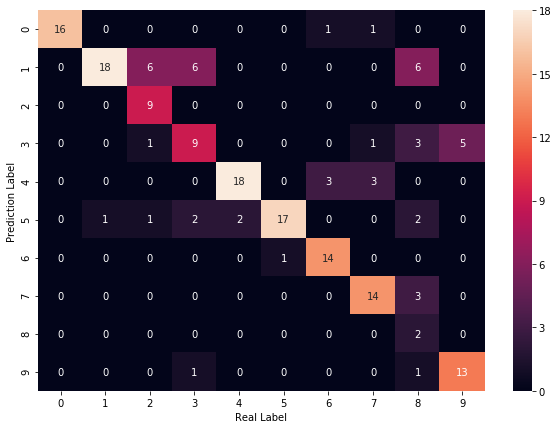

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:2 index:[1 2] real:2
#2 min_error:2 index:[3 7] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:1 index:[7] real:7
#6 min_error:1 index:[6] real:6
#7 min_error:1 index:[3] real:3
#8 min_error:1 index:[1 2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:2 index:[7] real:7
#11 min_error:2 index:[5 9] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:1 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:1 index:[3] real:3
#16 min_error:2 index:[5 9] real:9
#17 min_error:1 index:[1] real:1
#18 min_error:2 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:1 index:[5] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:1 index:[3] real:3
#23 min_error:1 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:2 index:[4] real:6
#29 min_error:1 index:[3] real:9
#30 min_er

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7717996289424861
Avg Base Learner:0.8732838589981448


In [16]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.20555555555555555
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.3277777777777778
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5277777777777778
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.6
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7111111111111111


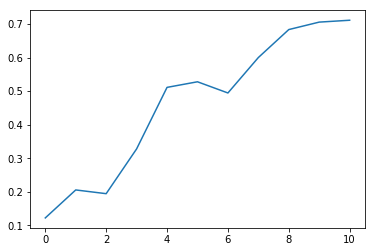

In [17]:
plt.plot(range(11),list_acc)
plt.show()

In [18]:
list_acc

[0.12222222222222222,
 0.20555555555555555,
 0.19444444444444445,
 0.3277777777777778,
 0.5111111111111111,
 0.5277777777777778,
 0.49444444444444446,
 0.6,
 0.6833333333333333,
 0.7055555555555556,
 0.7111111111111111]